In [4]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [5]:
plt.style.use('seaborn-whitegrid')
%matplotlib inline

In [6]:
wuhan_data = pd.read_csv('data/WHUCoV.pack.table', 
                       sep='\t', 
                       lineterminator='\n')

In [7]:
ebola_data = pd.read_csv('data/ebola.pack.table', 
                       sep='\t', 
                       lineterminator='\n')

In [37]:
print(type(wuhan_data))

<class 'pandas.core.frame.DataFrame'>


In [39]:
data.columns

Index(['seq.pos', 'node.id', 'node.offset', 'coverage'], dtype='object')

## WuHan

Text(0, 0.5, 'coverage')

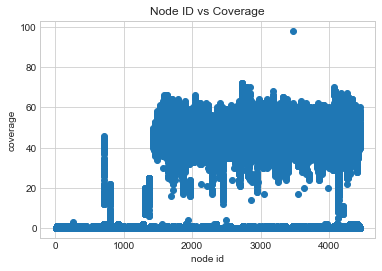

In [40]:
plt.scatter(wuhan_data['node.id'], wuhan_data['coverage']) 
plt.title('Node ID vs Coverage')
plt.xlabel('node id')
plt.ylabel('coverage')

In [85]:
np.max(wuhan_data['node.id']) 

4453

In [86]:
wuhan_data.shape

(73866, 4)

## Ebola

Text(0, 0.5, 'coverage')

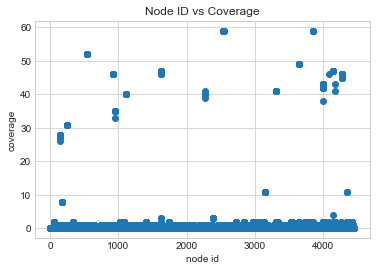

In [41]:
plt.scatter(ebola_data['node.id'], ebola_data['coverage']) 
plt.title('Node ID vs Coverage')
plt.xlabel('node id')
plt.ylabel('coverage')

In [43]:
np.max(ebola_data['node.id']) 

4453

## Combined

We can transpose the full DataFrame to swap rows and columns `data.T`

In [56]:
type(wuhan_data['coverage'])

pandas.core.series.Series

In [83]:
w = np.array(wuhan_data['coverage'])
e = np.array(ebola_data['coverage'])

In [168]:
def convert_cov_to_row(e):
    e_cov = np.array(e['coverage'])
    rows = e_cov.shape[0]

    e_reshaped = e_cov.reshape(1,rows)

    e_reshaped.shape
    return pd.DataFrame(e_reshaped)

In [170]:
wuhan_cov = convert_cov_to_row(wuhan_data)
ebola_cov = convert_cov_to_row(ebola_data)

In [172]:
comb = wuhan_cov.append(ebola_cov)

In [173]:
comb

,0,1,2,3,4,5,6,7,8,9,...,73856,73857,73858,73859,73860,73861,73862,73863,73864,73865
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [175]:
wuhan_data[wuhan_data.columns[-1]].T

0        0
1        0
2        0
3        0
4        0
        ..
73861    0
73862    0
73863    0
73864    0
73865    0
Name: coverage, Length: 73866, dtype: int64

In [178]:
ebola_data[ebola_data.columns[-1]].T

0        0
1        0
2        0
3        0
4        0
        ..
73861    0
73862    0
73863    0
73864    0
73865    0
Name: coverage, Length: 73866, dtype: int64

In [206]:
["isolate_" + str(i) for i in range(2)]

['isolate_0', 'isolate_1']

In [207]:
# Combine

comb = pd.DataFrame([wuhan_data[wuhan_data.columns[-1]].T, ebola_data[ebola_data.columns[-1]].T], 
                    index=["isolate_"  + str(i) for i in range(2)])
display(comb)

,0,1,2,3,4,5,6,7,8,9,...,73856,73857,73858,73859,73860,73861,73862,73863,73864,73865
isolate_0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
isolate_1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## PCA

In [8]:
r = wuhan_data[wuhan_data.columns[-1]].T

In [10]:
r.T

0        0
1        0
2        0
3        0
4        0
        ..
73861    0
73862    0
73863    0
73864    0
73865    0
Name: coverage, Length: 73866, dtype: int64